In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Target function
f (x1 , x2) = sign(x21 + x22 − 0.6)

In [2]:
class TargetFunction:
    # Represents the problem target function
    def __init__(self):
        get_sign = lambda y: 1 if (y >= 0) else -1
        get_sign_vectorized = np.vectorize(get_sign) 
        self.__sign__ = get_sign_vectorized
    
    def get_class(self, x):
        return self.__sign__(np.sum(x**2, axis=1)-0.6)

In [3]:
class Dataset:
    # Problem train dataset consisting of each problem point x and its class (0,1)
    def __init__(self, num_samples, target_function):
        self.x = np.random.uniform(-1,1,(num_samples,2))
        self.y = target_function.get_class(self.x)
    
    # Apply a transformation function to each point of the input dataset
    def transform(self, transformation_function):
        self.x = np.apply_along_axis(transformation_function, 1, self.x)
    
    # Add noise to dataset, by default to the 10% of the total points
    def noise(self, noisy_points_perc=0.1):
        num_points = self.y.shape[0]
        num_noisy_points = int(num_points*noisy_points_perc)
        noisy_idx = np.random.randint(0, num_points, num_noisy_points)
        self.y[noisy_idx] = self.y[noisy_idx]*-1
        
    def plot(self):
        class_0_idx = np.argwhere(self.y == -1)
        class_1_idx = np.argwhere(self.y == 1)
        
        plt.scatter(self.x[class_0_idx,0], self.x[class_0_idx,1], marker='^')
        plt.scatter(self.x[class_1_idx,0], self.x[class_1_idx,1], marker='o')
        plt.show()

In [4]:
class LinearRegression:
    
    # Add the bias weight to the weights array (bias is x_O in the mooc notation)
    def __init__(self, num_input_points):
        self.weights = np.zeros(num_input_points+1)
        
    def __sign__(self, a):
        get_sign = lambda y: 1 if (y >= 0) else -1
        get_sign_vectorized = np.vectorize(get_sign) 
        return get_sign_vectorized(a)
    
    def load_weights(self, weights_array):
        self.weights = weights_array
        
    def classify(self, x):
        bias = np.ones(x.shape[0])
        x_bias = np.insert(x, 0, bias, axis=1)
        return self.__sign__(np.sum(x_bias*self.weights, axis=1))
    
    def train(self, x, y_real):
        bias = np.ones(x.shape[0])
        x_bias = np.insert(x, 0, bias, axis=1)
        x_bias_t = x_bias.transpose()
        x_bias_pseudo_inv = np.matmul(np.linalg.inv(np.matmul(x_bias_t, x_bias)), x_bias_t)
        self.weights = np.matmul(x_bias_pseudo_inv, y_real)

### Problem scenario

Dataset created by target function f (x1 , x2) = sign(x21 + x22 − 0.6)

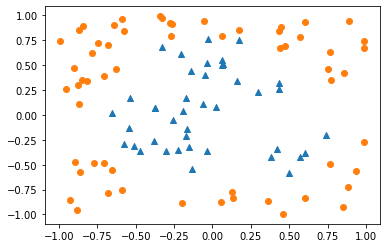

In [5]:
target_function = TargetFunction()
train_dataset = Dataset(100, target_function)
train_dataset.plot()

#### Exercise 8

Find *E_in* using linear regression given the following number of samples:

In [6]:
train_dataset_size = 1000

In [7]:
num_samples = 1000

linearRegression = LinearRegression(2)
target_function = TargetFunction()

e_in = []
for i in range(num_samples):
    print("Running sample ["+str(i)+"]\r", end='', flush=True)

    train_dataset = Dataset(train_dataset_size, target_function)
    train_dataset.noise()
    
    linearRegression.train(train_dataset.x, train_dataset.y)

    train_pred = linearRegression.classify(train_dataset.x)
    train_missclasified = np.argwhere(train_dataset.y != train_pred).flatten().size
    train_err = (train_missclasified*100/train_dataset_size/100)
    e_in.append(train_err)
    
print("E_in trained with N = "+str(train_dataset_size)+" points: "+str(np.mean(e_in)))

E_in trained with N = 1000 points: 0.5060490000000001


### Exercise 9

Apply the transformation (1, x1, x2 , x1 x2 , x21^2 , x22^2) and get the weights vector resulting from training.

In [8]:
# Transform each point of the Dataset
def exercise_9_transformation(x_n):
    x_n1 = x_n[0]
    x_n2 = x_n[1]

    return [x_n1, x_n2, x_n1*x_n2, x_n1**2, x_n2**2]

In [9]:
train_dataset_size = 1000
num_samples = 1000

linearRegression = LinearRegression(5)
target_function = TargetFunction()

weights = []

for i in range(num_samples):
    print("Running sample ["+str(i)+"]\r", end='', flush=True)

    train_dataset = Dataset(train_dataset_size, target_function)
    train_dataset.transform(exercise_9_transformation)
    train_dataset.noise()
    
    linearRegression.train(train_dataset.x, train_dataset.y)

    weights.append(linearRegression.weights)
    weights_averaged = np.mean(np.array(weights), axis=0)
    
print("Average weights vector is: ")
weights_averaged

Average weights vector is: 


array([-1.00372331e+00,  9.72420563e-04, -1.00307280e-03, -2.74898228e-03,
        1.57471954e+00,  1.57581621e+00])

### Exercise 10

Get E_out applying the exercise 9 transformation.

***Note: this exercise has a dependency on exercise 9. It must be executed before in order to get the weights average***

In [10]:
train_dataset_size = 1000
test_dataset_size = 1000

In [11]:
num_samples = 1000

linearRegression = LinearRegression(5)
linearRegression.load_weights(weights_averaged)
target_function = TargetFunction()

e_out = []
for i in range(num_samples):
    print("Running sample ["+str(i)+"]\r", end='', flush=True)

    test_dataset = Dataset(test_dataset_size, target_function)
    test_dataset.noise()
    test_dataset.transform(exercise_9_transformation)

    test_pred = linearRegression.classify(test_dataset.x)
    test_missclasified = np.argwhere(test_dataset.y != test_pred).flatten().size
    test_err = (test_missclasified*100/test_dataset_size/100)
    e_out.append(test_err)
    
print("E_out trained with N = "+str(train_dataset_size)+" points: "+str(np.mean(e_out)))

E_out trained with N = 1000 points: 0.11901500000000001
